In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset View

In [85]:
car = pd.read_csv("CO2 Emissions_Canada.csv")
car.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Dropping Unnecessary Columns

In [86]:
car.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [87]:
car['Model']=car['Model'].str.upper()

# Finding Duplcates

In [88]:
dup = car[car.duplicated(subset=['Make','Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type'])]
dup.sort_values(by=['CO2 Emissions(g/km)'],ascending=False)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
6640,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,22.2,522
5575,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,22.2,522
6046,LAMBORGHINI,AVENTADOR ROADSTER,TWO-SEATER,6.5,12,AM7,Z,21.7,493
7059,LAMBORGHINI,AVENTADOR ROADSTER,TWO-SEATER,6.5,12,AM7,Z,21.7,493
6045,LAMBORGHINI,AVENTADOR COUPE,TWO-SEATER,6.5,12,AM7,Z,21.5,487
...,...,...,...,...,...,...,...,...,...
4899,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.3,102
6949,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.2,99
6950,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.1,96
4900,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.1,96


There are 1103 Duplicate rows by analyzing those rows we have found that there are minor changes in transmission, engine size, or fuel consumption for different variants of models.

In [95]:
car.drop_duplicates(subset=['Make','Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type'],keep="first",inplace=True)

In [96]:
car.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


# Checking Null Values

In [98]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3105 entries, 0 to 7379
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              3105 non-null   object 
 1   Model                             3105 non-null   object 
 2   Vehicle Class                     3105 non-null   object 
 3   Engine Size(L)                    3105 non-null   float64
 4   Cylinders                         3105 non-null   int64  
 5   Transmission                      3105 non-null   object 
 6   Fuel Type                         3105 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  3105 non-null   float64
 8   CO2 Emissions(g/km)               3105 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 242.6+ KB


There are no null values in the dataset

In [99]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),3105.0,3.181514,1.378615,0.9,2.0,3.0,3.8,8.4
Cylinders,3105.0,5.683414,1.880601,3.0,4.0,6.0,6.0,16.0
Fuel Consumption Comb (L/100 km),3105.0,11.092077,3.044241,4.1,9.0,10.6,12.7,26.1
CO2 Emissions(g/km),3105.0,251.950725,59.782260,96.0,208.0,246.0,290.0,522.0


In [101]:
car.to_excel("Clean_data.xlsx",index=False)

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

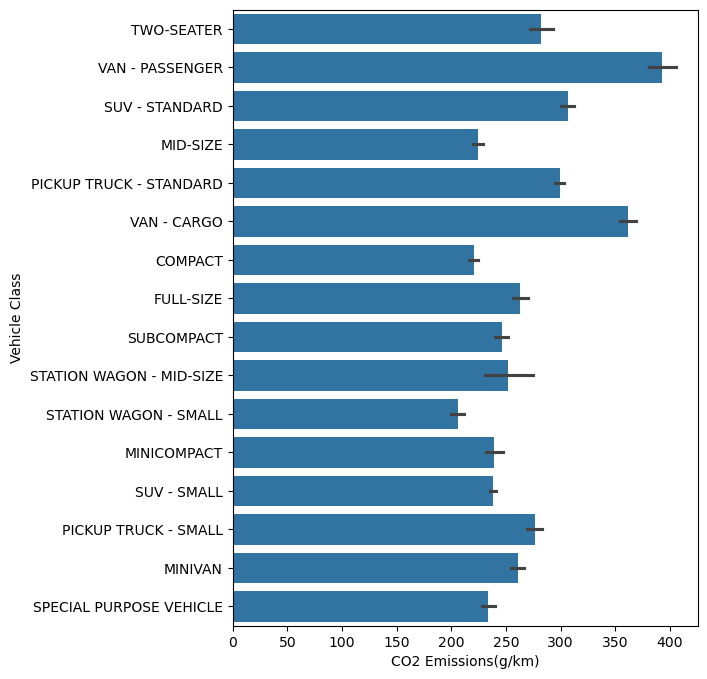

In [102]:
plt.figure(figsize = (6,8))
make_list=car.sort_values(by='CO2 Emissions(g/km)', ascending=False, axis=0, inplace=False)
sns.barplot(make_list, x='CO2 Emissions(g/km)', y='Vehicle Class')